In [ ]:
#### Pandas怎么处理日期索引的缺失
问题：按日期统计的数据，缺失了某天，导致数据不全该怎么补充日期？

可以用两种方法实现：
1. DataFrame.reindex,调整dataframe的索引以适应新的索引
2. DataFrame.resample,可以对时间序列重采样，支持补充缺失值

#### 问题：如果缺失了索引该怎么填充？

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
df=pd.DataFrame({
    'pdate':['2019-12-01','2019-12-02','2019-12-04','2019-12-05'],
    'pv':[100,200,400,500],
    'uv':[10,20,40,50],
})

df

,pdate,pv,uv
0,2019-12-01,100,10
1,2019-12-02,200,20
2,2019-12-04,400,40
3,2019-12-05,500,50


<AxesSubplot:xlabel='pdate'>

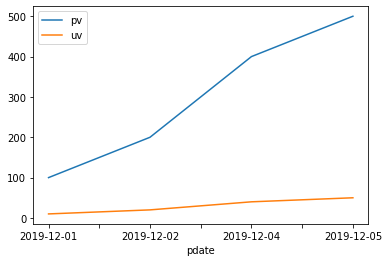

In [4]:
df.set_index('pdate').plot()

#### 问题，这里缺失了‘2019-12-03’的数据，导致数据不全该怎么补充？

#### 方法1：使用pandas.reindex方法

#### 1. 将df的索引变成日期索引

In [13]:
# 把日期列（此时还是字符串类型）变为索引
df_date=df.set_index('pdate')
df_date

,pv,uv
pdate,,
2019-12-01,100,10
2019-12-02,200,20
2019-12-04,400,40
2019-12-05,500,50


In [6]:
df_date.index

Index(['2019-12-01', '2019-12-02', '2019-12-04', '2019-12-05'], dtype='object', name='pdate')

In [7]:
# 将df的索引设置为日期索引
df_date=df_date.set_index(pd.to_datetime(df_date.index))
df_date

,pv,uv
pdate,,
2019-12-01,100,10
2019-12-02,200,20
2019-12-04,400,40
2019-12-05,500,50


In [8]:
df_date.index

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-04', '2019-12-05'], dtype='datetime64[ns]', name='pdate', freq=None)

#### 2. 使用pandas.reindex填充缺失的索引

In [10]:
# 生成完整的日期序列
pdates=pd.date_range(start='2019-12-01', end='2019-12-05')
pdates

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
               '2019-12-05'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df_date_new=df_date.reindex(pdates,fill_value=0)
df_date_new

,pv,uv
2019-12-01,100,10
2019-12-02,200,20
2019-12-03,0,0
2019-12-04,400,40
2019-12-05,500,50


<AxesSubplot:>

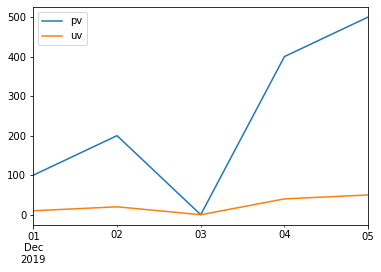

In [12]:
df_date_new.plot()

#### 方法2：使用pandas.resample方法

#### 1.先将索引变成日期索引

In [14]:
df

,pdate,pv,uv
0,2019-12-01,100,10
1,2019-12-02,200,20
2,2019-12-04,400,40
3,2019-12-05,500,50


In [17]:
df_new2=df.set_index(pd.to_datetime(df['pdate'])).drop('pdate',axis=1)
df_new2

,pv,uv
pdate,,
2019-12-01,100,10
2019-12-02,200,20
2019-12-04,400,40
2019-12-05,500,50


In [18]:
df_new2.index

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-04', '2019-12-05'], dtype='datetime64[ns]', name='pdate', freq=None)

#### 2. 使用dataframe的resample的方法按照天重采样

resample的含义：
改变数据的时间频率，比如把天数据变成月份，或者把小时数据变成分钟级别

resample的语法：
(DataFrame or Series).resample(arguments).(aggregate function)

resample的采样规则参数：
<https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases>

In [19]:
# 由于采样会让区间变成一个值，所以需要指定mean等采样值的设定方法
df_new2=df_new2.resample('D').mean().fillna(0)
df_new2

,pv,uv
pdate,,
2019-12-01,100.0,10.0
2019-12-02,200.0,20.0
2019-12-03,0.0,0.0
2019-12-04,400.0,40.0
2019-12-05,500.0,50.0


In [20]:
# resample的使用方式
df_new2.resample('2D').mean()

,pv,uv
pdate,,
2019-12-01,150.0,15.0
2019-12-03,200.0,20.0
2019-12-05,500.0,50.0
